<a href="https://colab.research.google.com/github/haraharaman/learning/blob/main/python100knocks/4%E7%AB%A0_%E9%A1%A7%E5%AE%A2%E3%81%AE%E8%A1%8C%E5%8B%95%E3%82%92%E4%BA%88%E6%B8%AC%E3%81%99%E3%82%8B10%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# 作業フォルダへの移動を行います。
# 人によって作業場所がことなるので、その場合作業場所を変更してください。
import os 
os.chdir('/content/drive/MyDrive/勉強/Colab Notebooks/100knock-data_analytics/4章') #ここを変更。

# 4章 顧客の全体像を把握する１０本ノック

引き続き、スポーツジムの会員データを使って顧客の行動を分析していきます。  
３章で顧客の全体像を把握しました。  
ここからは、機械学習を用いて顧客のグループ化や顧客の利用予測行なっていきましょう。  
ここでは、教師なし学習、教師あり学習の回帰を取り扱います。

### ノック31：データを読み込んで確認しよう

In [37]:
import pandas as pd
customer = pd.read_csv("customer_join.csv")
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,0,2019-04-30,1


In [38]:
log = pd.read_csv("use_log.csv")
log

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [39]:
print(log.isnull().sum())
print(customer.isnull().sum())

log_id         0
customer_id    0
usedate        0
dtype: int64
customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64


### ノック32：クラスタリングで顧客をグループ化しよう

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#データの標準化
scaler = StandardScaler()
data = scaler.fit_transform(customer[["mean","median","max","min","membership_period"]])

#クラスタリングを行い、結果をもとのCSVに追加
kmeans = KMeans(n_clusters=4, random_state=0)
customer["cluster_id"] =  kmeans.fit_predict(data)

customer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,cluster_id
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,0,2019-04-30,1,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,0,2019-04-30,1,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,0,2019-04-30,1,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,0,2019-04-30,1,0


### ノック33：クラスタリング結果を分析しよう

In [71]:
result = customer[["mean","median","max","min","membership_period","cluster_id"]]


,mean,median,max,min,membership_period
cluster_id,,,,,
0,8.061942,8.047024,10.014286,6.175000,7.019048
1,4.677561,4.670937,7.233787,2.153723,36.915933
2,3.065504,2.900130,4.783398,1.649805,9.276265
3,5.539535,5.391141,8.756006,2.702703,14.867868


In [72]:
result.groupby("cluster_id").count()

,mean,median,max,min,membership_period
cluster_id,,,,,
0,840,840,840,840,840
1,1249,1249,1249,1249,1249
2,771,771,771,771,771
3,1332,1332,1332,1332,1332


### ノック34：クラスタリング結果を可視化してみよう

In [79]:
#分析結果を主成分分析で二軸に変換する
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
embed = pca.fit_transform(result)
embed = pd.DataFrame(embed)

#もとのクラスタリング結果と紐づける
embed["cluster_id"] = result["cluster_id"]
embed.head

<bound method NDFrame.head of               0         1  cluster_id
0     28.166833  1.223410           1
1     28.134686  1.268174           1
2     28.178423  0.499632           1
3     28.207888  0.447074           1
4     28.330508 -1.224599           1
...         ...       ...         ...
4187 -18.197372  4.077117           0
4188 -18.477021  8.010271           0
4189 -18.197372  4.077117           0
4190 -18.616846  9.976848           0
4191 -18.477021  8.010271           0

[4192 rows x 3 columns]>

<Axes: xlabel='0', ylabel='1'>

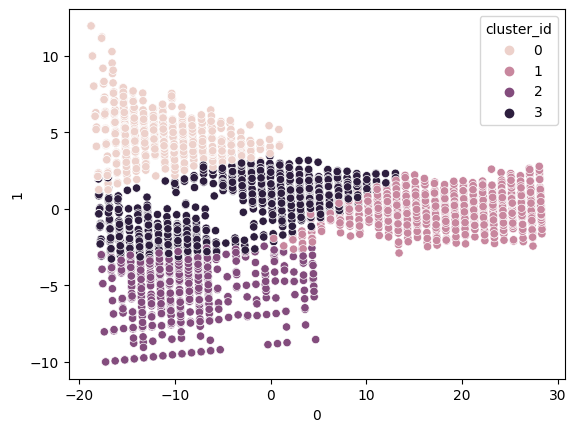

In [84]:
#二軸の特徴量とクラスタリングをグラフ化する
import seaborn as sns
sns.scatterplot(x=0,y=1,hue="cluster_id", data=embed)

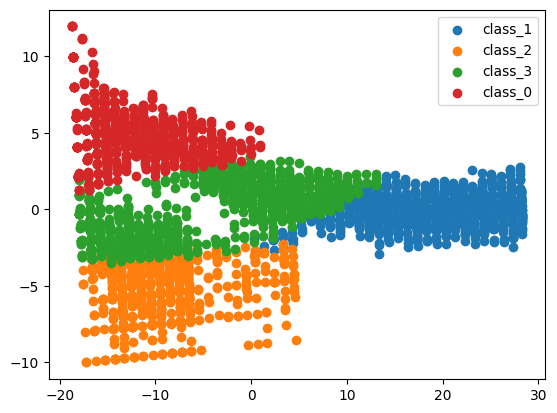

In [101]:
#matplotlibでの実装
import matplotlib.pyplot as plt
%matplotlib inline
for i in embed["cluster_id"].unique():
  tmp = embed.loc[embed["cluster_id"]==i]
  plt.scatter(x=tmp[0], y=tmp[1],label = f"class_{i}")
  plt.legend()

### ノック35：クラスタリング結果をもとに退会顧客の傾向を把握しよう

In [118]:
customer.groupby(["cluster_id","is_deleted"], as_index=False).agg(["count","mean"])[["mean","median","max","min","routine_flg","membership_period"]]

<ipython-input-118-d17b74a71d4a>:1: FutureWarning: ['customer_id', 'name', 'class', 'gender', 'start_date', 'end_date', 'campaign_id', 'class_name', 'campaign_name', 'calc_date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  customer.groupby(["cluster_id","is_deleted"], as_index=False).agg(["count","mean"])[["mean","median","max","min","routine_flg","membership_period"]]


mean           median             max              min  \
                      count      mean  count      mean count       mean count   
cluster_id is_deleted                                                           
0          0            821  8.081849    821  8.071864   821  10.032887   821   
           1             19  7.201754     19  6.973684    19   9.210526    19   
1          0           1231  4.686840   1231  4.679529  1231   7.239643  1231   
           1             18  4.042985     18  4.083333    18   6.833333    18   
2          1            771  3.065504    771  2.900130   771   4.783398   771   
3          0            790  5.991621    790  5.991772   790   8.767089   790   
           1            542  4.880589    542  4.515683   542   8.739852   542   

                                routine_flg           membership_period  \
                           mean       count      mean             count   
cluster_id is_deleted                                                     
0          0           6.192448         821  0.952497               821   
           1           5.421053          19  0.315789                19   
1          0           2.157595        1231  1.000000              1231   
           1           1.888889          18  0.888889                18   
2          1           1.649805         771  0.352789               771   
3          0           3.227848         790  0.992405               790   
           1           1.937269         542  0.594096               542   

                                  
                            mean  
cluster_id is_deleted             
0          0            7.152253  
           1            1.263158  
1          0           37.138911  
           1           21.666667  
2          1            9.276265  
3          0           20.929114  
           1            6.033210

In [119]:
customer.groupby(["cluster_id","routine_flg"],as_index=False).agg(["count","mean"])[["mean","median","max","min","membership_period"]]

<ipython-input-119-51ec00c9657e>:1: FutureWarning: ['customer_id', 'name', 'class', 'gender', 'start_date', 'end_date', 'campaign_id', 'class_name', 'campaign_name', 'calc_date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  customer.groupby(["cluster_id","routine_flg"],as_index=False).agg(["count","mean"])[["mean","median","max","min","membership_period"]]


mean           median             max             \
                       count      mean  count      mean count       mean   
cluster_id routine_flg                                                     
0          0              52  8.608974     52  8.500000    52   9.269231   
           1             788  8.025843    788  8.017132   788  10.063452   
1          0               2  4.100000      2  3.750000     2   7.000000   
           1            1247  4.678487   1247  4.672414  1247   7.234162   
2          0             499  2.786765    499  2.594188   499   4.184369   
           1             272  3.576865    272  3.461397   272   5.882353   
3          0             226  5.022224    226  4.617257   226   8.654867   
           1            1106  5.645242   1106  5.549277  1106   8.776673   

                         min           membership_period             
                       count      mean             count       mean  
cluster_id routine_flg                                               
0          0              52  8.057692                52   1.250000  
           1             788  6.050761               788   7.399746  
1          0               2  2.500000                 2  22.500000  
           1            1247  2.153168              1247  36.939054  
2          0             499  1.687375               499   8.511022  
           1             272  1.580882               272  10.680147  
3          0             226  2.172566               226   3.907080  
           1            1106  2.811031              1106  17.107595

### ノック36：翌月の利用回数予測を行うためのデータ準備をしよう

In [1]:
log["usedate"] = pd.to_datetime(log["usedate"])
log["month"] = log["usedate"].dt.strftime("%Y%m")
log

NameError: ignored

### ノック37：特徴となる変数を付与しよう

### ノック38：来月の利用回数予測モデルを作成しよう

### ノック39：モデルに寄与している変数を確認しよう

### ノック40：来月の利用回数を予測しよう